In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from tqdm import tqdm
import numpy as np

In [3]:
ct = pd.read_csv('customer.csv',index_col=[0])
ct

,customer_id,home_store,gender,customer_first-name,birthdate,customer_email,customer_since,loyalty_card_number,frequency,monetary,transaction_datetime,recency,avg_buy
0,1,3,M,Kelly Key,5/29/1950,Venus@adipiscing.edu,1/4/2017,908-424-2890,4.791209,333.00,2022-04-29 19:41:00,0,3.619565
1,2,3,M,Clark Schroeder,7/30/1950,Nora@fames.gov,1/7/2017,032-732-6308,1.626556,1021.65,2022-04-26 08:21:00,3,4.221694
2,3,3,M,Elvis Cardenas,9/30/1950,Brianna@tellus.edu,1/10/2017,459-375-9187,1.080556,2082.15,2022-04-24 14:14:00,5,5.767729
3,4,3,M,Rafael Estes,12/1/1950,Ina@non.gov,1/13/2017,576-640-9226,4.574468,314.75,2022-04-26 08:42:00,3,3.313158
4,5,3,M,Colin Lynn,2/1/1951,Dale@Integer.com,1/15/2017,344-674-6569,6.357143,276.00,2022-04-29 07:36:00,0,3.887324
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,8498,8,Not Specified,April,12/7/2000,Daniel@placerat.us,1/20/2019,705-545-5246,4.264706,457.50,2022-04-27 17:11:00,2,4.441748
2246,8499,8,F,Clementine,6/4/1996,Dieter@ac.us,11/9/2017,297-550-7776,3.111111,656.50,2022-04-29 08:22:00,0,4.827206
2247,8500,8,Not Specified,Linda,3/1/1990,Dillon@pretium.gov,8/21/2017,255-202-7435,1.620253,1018.65,2022-04-26 10:07:00,3,4.280042
2248,8501,8,F,Moana,8/27/1966,Herrod@ultrices.gov,7/6/2018,241-906-4009,7.125000,298.75,2022-04-28 13:34:00,1,4.596154


In [8]:
ct['customer_since'] = pd.to_datetime(ct['customer_since'])
ct.sort_values("customer_since")

,customer_id,home_store,gender,customer_first-name,birthdate,customer_email,customer_since,loyalty_card_number
2250,8600,8,Not Specified,Non-Member,7/28/1983,sales@mavenroasters8.io,2017-01-01,000-000-0008
1747,6000,5,Not Specified,Non-Member,7/28/1983,sales@mavenroasters5.io,2017-01-01,000-000-0005
800,1000,3,Not Specified,Non-Member,7/28/1983,sales@mavenroasters3.io,2017-01-01,000-000-0003
2231,8483,8,M,Samuel,5/12/1957,Oliver@libero.net,2017-01-03,871-571-3263
2042,8294,8,F,Charlotte,4/30/1993,Xaviera@Quisque.com,2017-01-03,385-899-7846
...,...,...,...,...,...,...,...,...
846,5045,5,M,Hall,4/9/2001,Grady@viverra.gov,2019-04-09,141-386-1471
1740,5939,5,F,Hope,4/9/2001,Emmanuel@quis.org,2019-04-09,659-428-7985
299,300,3,M,Donovan Reeves,4/9/2001,Rhonda@scelerisque.org,2019-04-09,971-834-8561
699,700,3,F,Ava Mullins,4/9/2001,Kyle@In.org,2019-04-09,337-201-6353


In [10]:
ct['customer_email'].nunique()

2251

In [4]:
his = pd.read_csv('totalsale.csv',index_col=[0])
his

,transaction_id,transaction_datetime,store_id,staff_id,customer_id,product_id,quantity_sold,unit_price,promo_item_yn,current_cost,Total_Sale,Profit
0,363,2020-01-15 11:17:45,8,6,8600,72,1,3.25,Y,1.240,3.25,2.01
1,363,2020-01-15 11:17:45,8,6,8600,87,1,2.10,Y,0.750,2.10,1.35
2,1812,2020-01-15 17:14:59,8,43,8600,87,1,2.10,Y,0.750,2.10,1.35
3,1812,2020-01-15 17:14:59,8,43,8600,72,1,3.25,Y,1.240,3.25,2.01
4,1597,2020-01-15 19:17:28,8,45,8059,87,1,2.10,Y,0.750,2.10,1.35
...,...,...,...,...,...,...,...,...,...,...,...,...
553310,626,2022-04-29 19:57:00,8,15,8440,22,1,2.00,N,0.500,2.00,1.50
553311,626,2022-04-29 19:57:00,8,15,8440,77,1,3.00,N,0.890,3.00,2.11
553312,3849,2022-04-29 19:57:00,3,14,1000,52,2,2.50,N,0.625,5.00,3.75
553313,1578,2022-04-29 19:57:00,3,14,1000,51,2,3.00,N,0.750,6.00,4.50


In [11]:
his['customer_id'].nunique()

2250

In [3]:
data = his[his["transaction_datetime"]>="2022-02-01"].copy()
data

,transaction_id,transaction_datetime,store_id,staff_id,customer_id,product_id,quantity_sold,unit_price,promo_item_yn,current_cost,Total_Sale,Profit
444049,390,2022-02-01 07:01:00,5,12,5658,22,2,2.0,N,0.500,4.0,3.00
444050,1228,2022-02-01 07:02:00,5,30,5197,22,1,2.0,N,0.500,2.0,1.50
444051,1644,2022-02-01 07:03:00,5,12,5247,22,2,2.0,N,0.500,4.0,3.00
444052,1034,2022-02-01 07:04:00,5,30,5333,37,1,3.0,N,0.750,3.0,2.25
444053,1338,2022-02-01 07:06:00,5,30,5465,32,2,3.0,N,0.750,6.0,4.50
...,...,...,...,...,...,...,...,...,...,...,...,...
553310,626,2022-04-29 19:57:00,8,15,8440,22,1,2.0,N,0.500,2.0,1.50
553311,626,2022-04-29 19:57:00,8,15,8440,77,1,3.0,N,0.890,3.0,2.11
553312,3849,2022-04-29 19:57:00,3,14,1000,52,2,2.5,N,0.625,5.0,3.75
553313,1578,2022-04-29 19:57:00,3,14,1000,51,2,3.0,N,0.750,6.0,4.50


In [ ]:
pr = pd.read_csv('Data//Dim_product.csv')

In [10]:
pr = pr[['product_id','product_group','product_category','product_type']]

In [25]:
pr

,product_id,product_group,product_category,product_type
0,1,Whole Bean/Teas,Coffee beans,Organic Beans
1,2,Whole Bean/Teas,Coffee beans,House blend Beans
2,3,Whole Bean/Teas,Coffee beans,Espresso Beans
3,4,Whole Bean/Teas,Coffee beans,Espresso Beans
4,5,Whole Bean/Teas,Coffee beans,Gourmet Beans
...,...,...,...,...
82,83,Merchandise,Branded,Housewares
83,84,Add-ons,Flavours,Regular syrup
84,85,Beverages,Coffee,Specialty coffee
85,87,Beverages,Coffee,Barista Espresso


In [5]:
data = his.copy()

In [12]:
data = data.merge(pr, on='product_id')

In [27]:
grouped_data = data.groupby(['customer_id', 'product_category'])['quantity_sold'].sum().reset_index()

# Sắp xếp dữ liệu theo total_sale giảm dần và category_group theo thứ tự tăng dần
sorted_data = grouped_data.sort_values(by=['quantity_sold', 'product_category'], ascending=[False, True])

product_category = sorted_data.groupby('customer_id')['product_category'].first().reset_index()

In [ ]:
ct = ct.merge(product_category, on='customer_id')

In [34]:
ct['product_category'].value_counts()

product_category
Coffee                1376
Tea                    805
Drinking Chocolate      47
Bakery                  14
Flavours                 8
Name: count, dtype: int64

In [60]:
grouped_data = data.groupby(['customer_id', 'product_type'])['quantity_sold'].sum().reset_index()

# Sắp xếp dữ liệu theo total_sale giảm dần và category_group theo thứ tự tăng dần
sorted_data = grouped_data.sort_values(by=['quantity_sold', 'product_type'], ascending=[False, True])

product_type = sorted_data.groupby('customer_id')['product_type'].first().reset_index()

In [61]:
ct = ct.merge(product_type, on='customer_id')

In [5]:
# Chuyển đổi cột transaction_datetime thành kiểu dữ liệu datetime
data['transaction_datetime'] = pd.to_datetime(data['transaction_datetime'])

# Tạo cột cohort_week để lưu thông tin về tuần và năm của lần mua hàng đầu tiên của mỗi khách hàng
data['cohort_week'] = data.groupby('customer_id')['transaction_datetime'].transform('min').dt.to_period('W')

# Tạo cột cohort_index để tính số tuần kể từ lần mua hàng đầu tiên của mỗi khách hàng
data['cohort_index'] = (data['transaction_datetime'].dt.to_period('W') - data['cohort_week']).apply(lambda x: x.n)

data

,transaction_id,transaction_datetime,store_id,staff_id,customer_id,product_id,quantity_sold,unit_price,promo_item_yn,current_cost,Total_Sale,Profit,cohort_week,cohort_index
0,363,2020-01-15 11:17:45,8,6,8600,72,1,3.25,Y,1.240,3.25,2.01,2020-01-13/2020-01-19,0
1,363,2020-01-15 11:17:45,8,6,8600,87,1,2.10,Y,0.750,2.10,1.35,2020-01-13/2020-01-19,0
2,1812,2020-01-15 17:14:59,8,43,8600,87,1,2.10,Y,0.750,2.10,1.35,2020-01-13/2020-01-19,0
3,1812,2020-01-15 17:14:59,8,43,8600,72,1,3.25,Y,1.240,3.25,2.01,2020-01-13/2020-01-19,0
4,1597,2020-01-15 19:17:28,8,45,8059,87,1,2.10,Y,0.750,2.10,1.35,2020-01-13/2020-01-19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553310,626,2022-04-29 19:57:00,8,15,8440,22,1,2.00,N,0.500,2.00,1.50,2020-12-28/2021-01-03,69
553311,626,2022-04-29 19:57:00,8,15,8440,77,1,3.00,N,0.890,3.00,2.11,2020-12-28/2021-01-03,69
553312,3849,2022-04-29 19:57:00,3,14,1000,52,2,2.50,N,0.625,5.00,3.75,2020-12-28/2021-01-03,69
553313,1578,2022-04-29 19:57:00,3,14,1000,51,2,3.00,N,0.750,6.00,4.50,2020-12-28/2021-01-03,69


In [70]:
data['transaction_datetime'] = pd.to_datetime(data['transaction_datetime'])

data['Period'] = pd.cut(data['transaction_datetime'].dt.hour,
                        bins=[0, 6, 12, 18, 24],
                        labels=['Night', 'Morning', 'Afternoon', 'Evening'],
                        right=False)

In [72]:
data['Period'].value_counts()

Period
Morning      303275
Afternoon    196134
Evening       52624
Night          1282
Name: count, dtype: int64

In [74]:
data['datetime'] = data['transaction_datetime'].dt.date

In [80]:
data.groupby(['customer_id', 'datetime'])['Period'].nunique().reset_index()['Period'].sum()/2250/119

0.787891690009337

In [84]:
data[data['customer_id']==170]

,transaction_id,transaction_datetime,store_id,staff_id,customer_id,product_id,quantity_sold,unit_price,promo_item_yn,current_cost,Total_Sale,Profit,product_group,product_category,product_type,Period,datetime
94686,184,2021-01-21 10:27:00,3,20,170,54,1,2.50,N,0.625,2.50,1.875,Beverages,Tea,Brewed Chai tea,Morning,2021-01-21
95033,222,2021-02-08 13:33:00,3,6,170,54,1,2.50,N,0.625,2.50,1.875,Beverages,Tea,Brewed Chai tea,Afternoon,2021-02-08
95133,184,2021-02-14 10:27:00,3,20,170,54,1,2.50,N,0.625,2.50,1.875,Beverages,Tea,Brewed Chai tea,Morning,2021-02-14
95583,222,2021-03-08 13:33:00,3,6,170,54,1,2.50,N,0.625,2.50,1.875,Beverages,Tea,Brewed Chai tea,Afternoon,2021-03-08
95687,184,2021-03-14 10:27:00,3,20,170,54,1,2.50,N,0.625,2.50,1.875,Beverages,Tea,Brewed Chai tea,Morning,2021-03-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546209,184,2022-02-14 10:27:00,3,20,170,4,1,20.45,N,4.090,20.45,16.360,Whole Bean/Teas,Coffee beans,Espresso Beans,Morning,2022-02-14
546237,184,2022-03-14 10:27:00,3,20,170,4,1,20.45,N,4.090,20.45,16.360,Whole Bean/Teas,Coffee beans,Espresso Beans,Morning,2022-03-14
546251,184,2022-03-21 10:27:00,3,20,170,4,1,20.45,N,4.090,20.45,16.360,Whole Bean/Teas,Coffee beans,Espresso Beans,Morning,2022-03-21
546275,184,2022-04-14 10:27:00,3,20,170,4,1,20.45,N,4.090,20.45,16.360,Whole Bean/Teas,Coffee beans,Espresso Beans,Morning,2022-04-14


In [66]:
ct['frequency'].describe()

count    2250.000000
mean        4.707626
std         3.733716
min         0.001065
25%         2.819573
50%         3.849558
75%         5.454448
max        70.666667
Name: frequency, dtype: float64

In [14]:
cohort_metric = data.groupby(['cohort_week', 'cohort_index']).agg({'customer_id': pd.Series.nunique}).reset_index()
cohort_metric

,cohort_week,cohort_index,customer_id
0,2022-01-31/2022-02-06,0,1926
1,2022-01-31/2022-02-06,1,1372
2,2022-01-31/2022-02-06,2,843
3,2022-01-31/2022-02-06,3,1066
4,2022-01-31/2022-02-06,4,1790
...,...,...,...
61,2022-03-07/2022-03-13,7,4
62,2022-03-28/2022-04-03,0,2
63,2022-03-28/2022-04-03,1,1
64,2022-04-04/2022-04-10,0,1


In [52]:
cohort_metric.to_csv("cohort.csv")

In [15]:
# Tạo bảng Cohort theo tuần
cohort_table = data.groupby(['cohort_week', 'cohort_index']).agg({'customer_id': pd.Series.nunique}).reset_index()

# Chuyển đổi dữ liệu thành dạng pivot table
cohort_table = cohort_table.pivot(index='cohort_week', columns='cohort_index', values='customer_id')

cohort_table

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort_week,,,,,,,,,,,,,
2022-01-31/2022-02-06,1926.0,1372.0,843.0,1066.0,1790.0,1386.0,870.0,1087.0,1794.0,1831.0,1497.0,1386.0,1333.0
2022-02-07/2022-02-13,223.0,101.0,120.0,138.0,183.0,98.0,119.0,173.0,208.0,180.0,148.0,158.0,NaN
2022-02-14/2022-02-20,41.0,23.0,24.0,16.0,31.0,24.0,22.0,25.0,33.0,35.0,29.0,NaN,NaN
2022-02-21/2022-02-27,27.0,14.0,10.0,10.0,22.0,19.0,21.0,12.0,18.0,24.0,NaN,NaN,NaN
2022-02-28/2022-03-06,24.0,8.0,4.0,5.0,15.0,19.0,10.0,7.0,14.0,NaN,NaN,NaN,NaN
2022-03-07/2022-03-13,5.0,NaN,4.0,2.0,3.0,4.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN
2022-03-28/2022-04-03,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-04/2022-04-10,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-25/2022-05-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
cohort_table = pd.read_csv("cohort.csv")
cohort_table

,cohort_week,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2022-01-31/2022-02-06,1926.0,1372.0,843.0,1066.0,1790.0,1386.0,870.0,1087.0,1794.0,1831.0,1497.0,1386.0,1333.0
1,2022-02-07/2022-02-13,223.0,101.0,120.0,138.0,183.0,98.0,119.0,173.0,208.0,180.0,148.0,158.0,NaN
2,2022-02-14/2022-02-20,41.0,23.0,24.0,16.0,31.0,24.0,22.0,25.0,33.0,35.0,29.0,NaN,NaN
3,2022-02-21/2022-02-27,27.0,14.0,10.0,10.0,22.0,19.0,21.0,12.0,18.0,24.0,NaN,NaN,NaN
4,2022-02-28/2022-03-06,24.0,8.0,4.0,5.0,15.0,19.0,10.0,7.0,14.0,NaN,NaN,NaN,NaN
5,2022-03-07/2022-03-13,5.0,0.0,4.0,2.0,3.0,4.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN
6,2022-03-28/2022-04-03,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2022-04-04/2022-04-10,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2022-04-25/2022-05-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


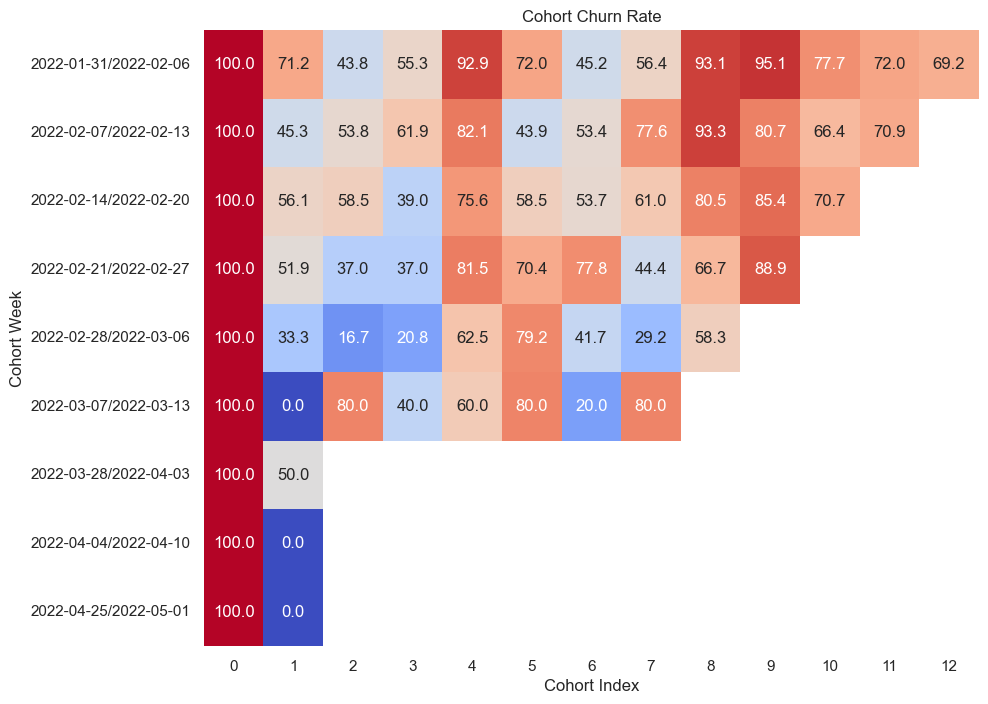

In [73]:
import pandas as pd
import numpy as np

# Định nghĩa dữ liệu cohort
data = {
    'cohort_week': ['2022-01-31/2022-02-06', '2022-02-07/2022-02-13', '2022-02-14/2022-02-20', '2022-02-21/2022-02-27',
                    '2022-02-28/2022-03-06', '2022-03-07/2022-03-13', '2022-03-28/2022-04-03', '2022-04-04/2022-04-10',
                    '2022-04-25/2022-05-01'],
    0: [1926.0, 223.0, 41.0, 27.0, 24.0, 5.0, 2.0, 1.0, 1.0],
    1: [1372.0, 101.0, 23.0, 14.0, 8.0, 0.0, 1.0, 0.0, 0.0],
    2: [843.0, 120.0, 24.0, 10.0, 4.0, 4.0, np.nan, np.nan, np.nan],
    3: [1066.0, 138.0, 16.0, 10.0, 5.0, 2.0, np.nan, np.nan, np.nan],
    4: [1790.0, 183.0, 31.0, 22.0, 15.0, 3.0, np.nan, np.nan, np.nan],
    5: [1386.0, 98.0, 24.0, 19.0, 19.0, 4.0, np.nan, np.nan, np.nan],
    6: [870.0, 119.0, 22.0, 21.0, 10.0, 1.0, np.nan, np.nan, np.nan],
    7: [1087.0, 173.0, 25.0, 12.0, 7.0, 4.0, np.nan, np.nan, np.nan],
    8: [1794.0, 208.0, 33.0, 18.0, 14.0, np.nan, np.nan, np.nan, np.nan],
    9: [1831.0, 180.0, 35.0, 24.0, np.nan, np.nan, np.nan, np.nan, np.nan],
    10: [1497.0, 148.0, 29.0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    11: [1386.0, 158.0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    12: [1333.0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
}

# Tạo DataFrame từ dữ liệu cohort
cohort_table = pd.DataFrame(data)

# Chuyển cohort_week thành index
cohort_table.set_index('cohort_week', inplace=True)

# Tính toán churn rate cho từng cohort
churn_rate = cohort_table.divide(cohort_table[0], axis=0) * 100

# Hiển thị heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(churn_rate, annot=True, fmt=".1f", cmap="coolwarm", cbar=False)
plt.title('Cohort Churn Rate')
plt.xlabel('Cohort Index')
plt.ylabel('Cohort Week')
plt.show()


In [77]:
churn_rate['New User'] = cohort_table[0]
churn_rate

,0,1,2,3,4,5,6,7,8,9,10,11,12,New User
cohort_week,,,,,,,,,,,,,,
2022-01-31/2022-02-06,100.0,71.235722,43.769470,55.347871,92.938733,71.962617,45.171340,56.438214,93.146417,95.067497,77.725857,71.962617,69.2108,1926.0
2022-02-07/2022-02-13,100.0,45.291480,53.811659,61.883408,82.062780,43.946188,53.363229,77.578475,93.273543,80.717489,66.367713,70.852018,NaN,223.0
2022-02-14/2022-02-20,100.0,56.097561,58.536585,39.024390,75.609756,58.536585,53.658537,60.975610,80.487805,85.365854,70.731707,NaN,NaN,41.0
2022-02-21/2022-02-27,100.0,51.851852,37.037037,37.037037,81.481481,70.370370,77.777778,44.444444,66.666667,88.888889,NaN,NaN,NaN,27.0
2022-02-28/2022-03-06,100.0,33.333333,16.666667,20.833333,62.500000,79.166667,41.666667,29.166667,58.333333,NaN,NaN,NaN,NaN,24.0
2022-03-07/2022-03-13,100.0,0.000000,80.000000,40.000000,60.000000,80.000000,20.000000,80.000000,NaN,NaN,NaN,NaN,NaN,5.0
2022-03-28/2022-04-03,100.0,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2022-04-04/2022-04-10,100.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2022-04-25/2022-05-01,100.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [ ]:
churn_rate.to_csv("churn_rate.csv")

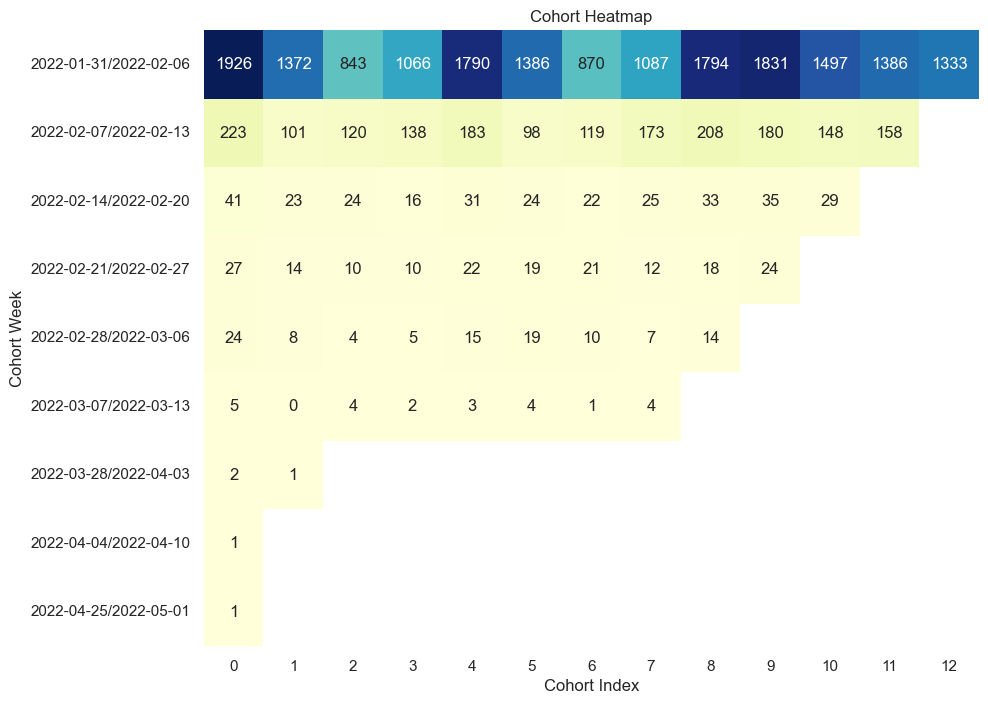

In [64]:
# Đặt cột 'cohort_week' làm index
cohort_table = cohort_table.set_index('cohort_week')

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cohort_table, annot=True, fmt=".0f", cmap="YlGnBu", cbar=False)
plt.title('Cohort Heatmap')
plt.xlabel('Cohort Index')
plt.ylabel('Cohort Week')
plt.show()

In [57]:
# Tính toán cohort dạng phần trăm (churn rate)
cohort_table_percent = cohort_table.copy()  # Tạo một bản sao của bảng Cohort
for col in cohort_table_percent.columns:
    cohort_table_percent[col] = cohort_table_percent[col] / cohort_table_percent.iloc[:, 0] * 100

# Hiển thị bảng Cohort dạng phần trăm (churn rate)
cohort_table_percent


cohort_index,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort_week,,,,,,,,,,,,,
2022-01-31/2022-02-06,100.0,1372.0,843.0,1066.0,1790.0,1386.0,870.0,1087.0,1794.0,1831.0,1497.0,1386.0,1333.0
2022-02-07/2022-02-13,100.0,101.0,120.0,138.0,183.0,98.0,119.0,173.0,208.0,180.0,148.0,158.0,NaN
2022-02-14/2022-02-20,100.0,23.0,24.0,16.0,31.0,24.0,22.0,25.0,33.0,35.0,29.0,NaN,NaN
2022-02-21/2022-02-27,100.0,14.0,10.0,10.0,22.0,19.0,21.0,12.0,18.0,24.0,NaN,NaN,NaN
2022-02-28/2022-03-06,100.0,8.0,4.0,5.0,15.0,19.0,10.0,7.0,14.0,NaN,NaN,NaN,NaN
2022-03-07/2022-03-13,100.0,NaN,4.0,2.0,3.0,4.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN
2022-03-28/2022-04-03,100.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-04/2022-04-10,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-25/2022-05-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
data[data['transaction_id']==1000]

,transaction_id,transaction_datetime,store_id,staff_id,customer_id,product_id,quantity_sold,unit_price,promo_item_yn,current_cost,Total_Sale,Profit
4152,1000,2021-01-01 16:07:00,3,17,732,23,2,2.50,N,0.6250,5.00,3.7500
6431,1000,2021-01-04 09:41:00,5,12,5312,39,1,4.25,N,1.0625,4.25,3.1875
17603,1000,2021-01-15 10:34:00,5,12,6000,51,1,3.00,N,0.7500,3.00,2.2500
18477,1000,2021-01-16 09:06:00,3,16,1000,24,2,3.00,N,0.7500,6.00,4.5000
19653,1000,2021-01-17 09:54:00,8,6,8600,55,2,4.00,N,1.0000,8.00,6.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
529776,1000,2022-04-16 09:06:00,3,16,1000,24,2,3.00,N,0.7500,6.00,4.5000
531799,1000,2022-04-17 09:54:00,8,6,8600,55,2,4.00,N,1.0000,8.00,6.0000
545501,1000,2022-04-25 08:51:00,5,28,6000,28,2,2.00,N,0.5000,4.00,3.0000
547485,1000,2022-04-26 10:24:00,8,42,8600,77,1,3.00,N,0.8900,3.00,2.1100


In [6]:
data['transaction_datetime'] = pd.to_datetime(data['transaction_datetime'])

In [7]:
# Xác định ngày mua hàng cuối cùng của mỗi khách hàng
last_purchase_date = data.groupby('customer_id')['transaction_datetime'].max().reset_index()

# Tính thời gian gần nhất mua hàng của mỗi khách hàng
today = pd.to_datetime('2022-04-30')
last_purchase_date['days_since_last_purchase'] = (today - last_purchase_date['transaction_datetime']).dt.days

# Hiển thị kết quả
last_purchase_date


,customer_id,transaction_datetime,days_since_last_purchase
0,1,2022-04-29 19:41:00,0
1,2,2022-04-26 08:21:00,3
2,3,2022-04-24 14:14:00,5
3,4,2022-04-26 08:42:00,3
4,5,2022-04-29 07:36:00,0
...,...,...,...
2245,8498,2022-04-27 17:11:00,2
2246,8499,2022-04-29 08:22:00,0
2247,8500,2022-04-26 10:07:00,3
2248,8501,2022-04-28 13:34:00,1


In [8]:
# Sắp xếp dữ liệu theo customer_id và transaction_date
data.sort_values(['customer_id', 'transaction_datetime'], inplace=True)

# Tính số ngày giữa các lần mua hàng
data['days_between_transactions'] = data.groupby('customer_id')['transaction_datetime'].diff().dt.days

# Tính số ngày trung bình họ mua một lần
frequency = data.groupby('customer_id')['days_between_transactions'].mean().reset_index(name='frequency')

frequency

,customer_id,frequency
0,1,4.791209
1,2,1.626556
2,3,1.080556
3,4,4.574468
4,5,6.357143
...,...,...
2245,8498,4.264706
2246,8499,3.111111
2247,8500,1.620253
2248,8501,7.125000


In [18]:
avg_buy = data.groupby('customer_id')['Total_Sale'].mean()

In [ ]:
ct.merge(avg_buy, on='customer_id')

In [9]:
ct = ct.merge(frequency, on='customer_id')

In [10]:
monetary = data.groupby('customer_id')['Total_Sale'].sum().reset_index(name='monetary')

In [11]:
ct = ct.merge(monetary, on='customer_id')
ct

,customer_id,home_store,gender,customer_first-name,birthdate,customer_email,customer_since,loyalty_card_number,frequency,monetary
0,1,3,M,Kelly Key,5/29/1950,Venus@adipiscing.edu,1/4/2017,908-424-2890,4.791209,333.00
1,2,3,M,Clark Schroeder,7/30/1950,Nora@fames.gov,1/7/2017,032-732-6308,1.626556,1021.65
2,3,3,M,Elvis Cardenas,9/30/1950,Brianna@tellus.edu,1/10/2017,459-375-9187,1.080556,2082.15
3,4,3,M,Rafael Estes,12/1/1950,Ina@non.gov,1/13/2017,576-640-9226,4.574468,314.75
4,5,3,M,Colin Lynn,2/1/1951,Dale@Integer.com,1/15/2017,344-674-6569,6.357143,276.00
...,...,...,...,...,...,...,...,...,...,...
2245,8498,8,Not Specified,April,12/7/2000,Daniel@placerat.us,1/20/2019,705-545-5246,4.264706,457.50
2246,8499,8,F,Clementine,6/4/1996,Dieter@ac.us,11/9/2017,297-550-7776,3.111111,656.50
2247,8500,8,Not Specified,Linda,3/1/1990,Dillon@pretium.gov,8/21/2017,255-202-7435,1.620253,1018.65
2248,8501,8,F,Moana,8/27/1966,Herrod@ultrices.gov,7/6/2018,241-906-4009,7.125000,298.75


In [12]:
ct = ct.merge(last_purchase_date, on='customer_id')
ct

,customer_id,home_store,gender,customer_first-name,birthdate,customer_email,customer_since,loyalty_card_number,frequency,monetary,transaction_datetime,days_since_last_purchase
0,1,3,M,Kelly Key,5/29/1950,Venus@adipiscing.edu,1/4/2017,908-424-2890,4.791209,333.00,2022-04-29 19:41:00,0
1,2,3,M,Clark Schroeder,7/30/1950,Nora@fames.gov,1/7/2017,032-732-6308,1.626556,1021.65,2022-04-26 08:21:00,3
2,3,3,M,Elvis Cardenas,9/30/1950,Brianna@tellus.edu,1/10/2017,459-375-9187,1.080556,2082.15,2022-04-24 14:14:00,5
3,4,3,M,Rafael Estes,12/1/1950,Ina@non.gov,1/13/2017,576-640-9226,4.574468,314.75,2022-04-26 08:42:00,3
4,5,3,M,Colin Lynn,2/1/1951,Dale@Integer.com,1/15/2017,344-674-6569,6.357143,276.00,2022-04-29 07:36:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2245,8498,8,Not Specified,April,12/7/2000,Daniel@placerat.us,1/20/2019,705-545-5246,4.264706,457.50,2022-04-27 17:11:00,2
2246,8499,8,F,Clementine,6/4/1996,Dieter@ac.us,11/9/2017,297-550-7776,3.111111,656.50,2022-04-29 08:22:00,0
2247,8500,8,Not Specified,Linda,3/1/1990,Dillon@pretium.gov,8/21/2017,255-202-7435,1.620253,1018.65,2022-04-26 10:07:00,3
2248,8501,8,F,Moana,8/27/1966,Herrod@ultrices.gov,7/6/2018,241-906-4009,7.125000,298.75,2022-04-28 13:34:00,1


In [13]:
ct.rename(columns={'days_since_last_purchase': 'recency'},inplace=True)

In [24]:
ct.rename(columns={'Total_Sale': 'avg_buy'},inplace=True)

In [30]:
ct

,customer_id,home_store,gender,customer_first-name,birthdate,customer_email,customer_since,loyalty_card_number,frequency,monetary,transaction_datetime,recency,avg_buy
0,1,3,M,Kelly Key,5/29/1950,Venus@adipiscing.edu,1/4/2017,908-424-2890,4.791209,333.00,2022-04-29 19:41:00,0,3.619565
1,2,3,M,Clark Schroeder,7/30/1950,Nora@fames.gov,1/7/2017,032-732-6308,1.626556,1021.65,2022-04-26 08:21:00,3,4.221694
2,3,3,M,Elvis Cardenas,9/30/1950,Brianna@tellus.edu,1/10/2017,459-375-9187,1.080556,2082.15,2022-04-24 14:14:00,5,5.767729
3,4,3,M,Rafael Estes,12/1/1950,Ina@non.gov,1/13/2017,576-640-9226,4.574468,314.75,2022-04-26 08:42:00,3,3.313158
4,5,3,M,Colin Lynn,2/1/1951,Dale@Integer.com,1/15/2017,344-674-6569,6.357143,276.00,2022-04-29 07:36:00,0,3.887324
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,8498,8,Not Specified,April,12/7/2000,Daniel@placerat.us,1/20/2019,705-545-5246,4.264706,457.50,2022-04-27 17:11:00,2,4.441748
2246,8499,8,F,Clementine,6/4/1996,Dieter@ac.us,11/9/2017,297-550-7776,3.111111,656.50,2022-04-29 08:22:00,0,4.827206
2247,8500,8,Not Specified,Linda,3/1/1990,Dillon@pretium.gov,8/21/2017,255-202-7435,1.620253,1018.65,2022-04-26 10:07:00,3,4.280042
2248,8501,8,F,Moana,8/27/1966,Herrod@ultrices.gov,7/6/2018,241-906-4009,7.125000,298.75,2022-04-28 13:34:00,1,4.596154


<Axes: xlabel='avg_buy', ylabel='Density'>

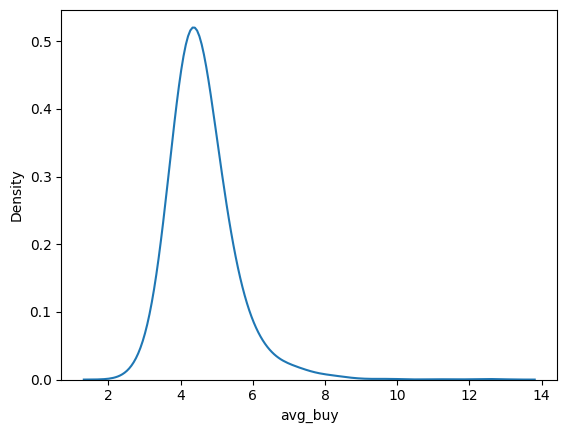

In [32]:
sns.kdeplot(data=ct, x='avg_buy', bw_adjust=2)

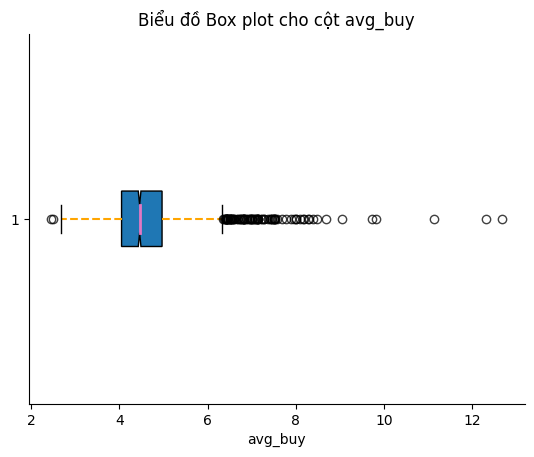

In [34]:
avg_buy = ct["avg_buy"]

# Tạo đối tượng Figure và Axes
fig, ax = plt.subplots()

# Vẽ box plot với các tùy chỉnh
boxplot = ax.boxplot(avg_buy, patch_artist=True, notch=True, vert=False)

# Tùy chỉnh màu sắc của hộp
for patch in boxplot['boxes']:
    patch.set(facecolor='#1f77b4')  # Màu xanh dương

# Tùy chỉnh màu sắc và kích thước của đường viền
for patch in boxplot['medians']:
    patch.set(color='#e377c2', linewidth=2)  # Màu hồng

# Tùy chỉnh màu sắc và kích thước của đường chỉ mục
for patch in boxplot['whiskers']:
    patch.set(color='#ffa500', linewidth=1.5, linestyle="--")  # Màu cam đậm, đường nét đứt

# Tùy chỉnh màu sắc và kích thước của điểm ngoại lệ
for patch in boxplot['fliers']:
    patch.set(marker='o', color='#ff7f0e', alpha=0.75)  # Màu cam nhạt, kích thước điểm ngoại lệ

# Đặt tiêu đề và nhãn cho trục x
ax.set_title("Biểu đồ Box plot cho cột avg_buy")
ax.set_xlabel("avg_buy")

# Xóa các trục trên và bên phải
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Hiển thị đồ thị
plt.show()

In [36]:
ct[['avg_buy']].describe()

,avg_buy
count,2250.000000
mean,4.593107
std,0.884520
min,2.450000
25%,4.047030
50%,4.456226
75%,4.965217
max,12.675862


In [55]:
df = ct[['customer_id','recency','frequency','monetary']]
df

,customer_id,recency,frequency,monetary
0,1,0,4.791209,333.00
1,2,3,1.626556,1021.65
2,3,5,1.080556,2082.15
3,4,3,4.574468,314.75
4,5,0,6.357143,276.00
...,...,...,...,...
2245,8498,2,4.264706,457.50
2246,8499,0,3.111111,656.50
2247,8500,3,1.620253,1018.65
2248,8501,1,7.125000,298.75


In [ ]:
df.to_csv('rfm.csv')